In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 

In [3]:
df = pd.read_csv('Fever.csv')
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
df.tail()

,A,B,Volunteer,Relief
31,3,2,4,10.1
32,3,3,1,13.5
33,3,3,2,13.0
34,3,3,3,13.3
35,3,3,4,13.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [6]:
df.shape

(36, 4)

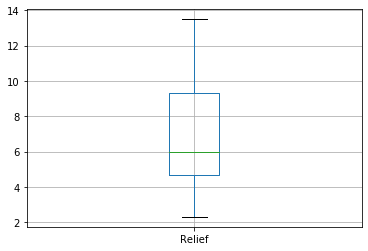

In [8]:
df.boxplot('Relief')

In [4]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

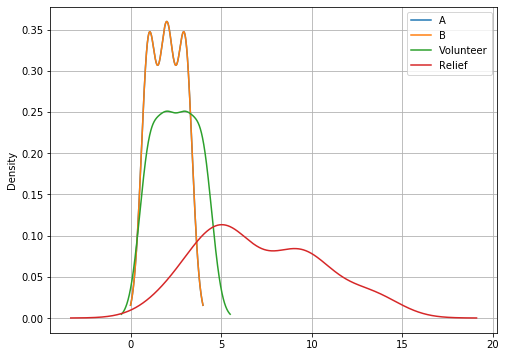

In [5]:
plt.figure(figsize=(8,6))
for i in df.columns:
    df[i].plot(kind='kde')
    plt.legend()
    plt.grid()
plt.show()

In [9]:
formula ='Relief~C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [ ]:
# P value is less than 0.05 so reject null hypothesis. 

In [5]:
dfd=df.melt(var_name='B') 

In [6]:
formula = 'Relief~C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


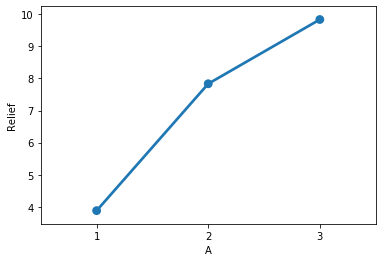

In [7]:
sns.pointplot(x='A', y='Relief', data=df, ci=None)

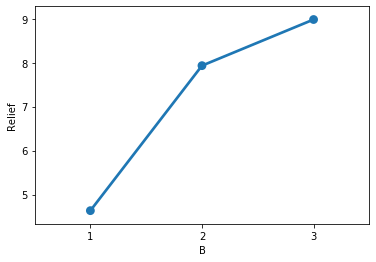

In [8]:
sns.pointplot(x='B', y='Relief', data=df, ci=None)

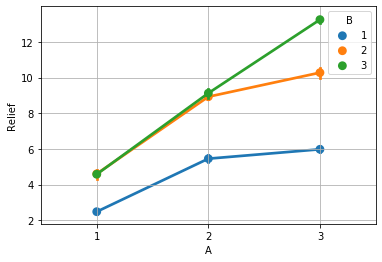

In [9]:
sns.pointplot(x = 'A', y = 'Relief', hue='B',data=df)
plt.grid()
plt.show()

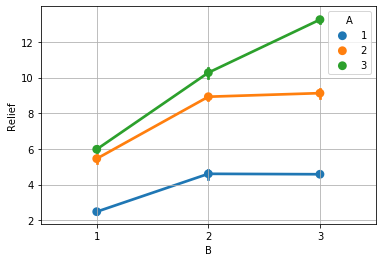

In [10]:
sns.pointplot(x = 'B', y = 'Relief', hue='A',data=df)
plt.grid()
plt.show()

In [ ]:
#The above interaction plots indicate close interaction among the two categorical variables

In [ ]:
#H0  : μ0=: The mean of Relief rate is same for all cases where ingredient A & B used.
#Ha :μa ≠ The mean of Relief rate is NOT the same in at least one of the cases where ingredient A & B used.


In [11]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [ ]:
#A p-value which is less than 0.05 indicates significance of variables A & B

In [12]:
model=ols('Relief~C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [ ]:
#Interaction Effect:As gender and diet interaction is 6.97208*10^17 which is <0.05 , there have a significant interaction.